In [59]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
!pip install plotly.express
from sklearn import preprocessing

In [60]:
import plotly.express as px

In [61]:
df = pd.read_csv('country-data.csv')
data_df = pd.read_csv('data-dictionary.csv')

In [62]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [63]:
data_df

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


In [64]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [65]:
df.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [66]:
df.shape

(167, 10)

In [67]:
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [68]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [69]:
for col in df.columns:
    print (f"{col}: \n {df[col].value_counts()}\n")

country: 
 country
Afghanistan    1
Morocco        1
Myanmar        1
Namibia        1
Nepal          1
              ..
Georgia        1
Germany        1
Ghana          1
Greece         1
Zambia         1
Name: count, Length: 167, dtype: int64

child_mort: 
 child_mort
4.5      4
3.2      3
24.1     3
4.2      3
111.0    3
        ..
55.2     1
19.2     1
29.1     1
25.1     1
83.1     1
Name: count, Length: 139, dtype: int64

exports: 
 exports
23.8    3
35.0    3
37.0    2
12.4    2
14.9    2
       ..
85.8    1
21.3    1
27.9    1
22.7    1
30.0    1
Name: count, Length: 147, dtype: int64

health: 
 health
5.07    3
5.20    3
6.91    2
9.01    2
5.25    2
       ..
2.66    1
4.48    1
4.66    1
8.06    1
5.89    1
Name: count, Length: 147, dtype: int64

imports: 
 imports
28.0    2
49.6    2
26.8    2
51.3    2
63.6    2
       ..
68.7    1
23.3    1
46.6    1
26.6    1
30.9    1
Name: count, Length: 151, dtype: int64

income: 
 income
28300    2
36200    2
1390     2
28700    2
15

In [70]:
df['country'] = df['country'].astype('category')
df['Country Names'] = df['country'].cat.codes
print(df)

                 country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  Country Names  
0         9.44        56.2       5.82    553     

In [71]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Country Names
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,3
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,4
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,162
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,163
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,164
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,165


In [73]:
df.drop(['country'], axis = 1, inplace = True)
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Country Names
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,3
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,4
...,...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,162
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,163
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,164
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,165


In [74]:
scaler = StandardScaler()
df_mortscaled = scaler.fit_transform(df.drop(columns = ['child_mort']))

In [75]:
pca = PCA(n_components = 2)
df_mortpca = pca.fit_transform(df_mortscaled)

In [76]:
df_mortscaled_pca = pd.DataFrame(df_mortpca)

<Axes: xlabel='0', ylabel='1'>

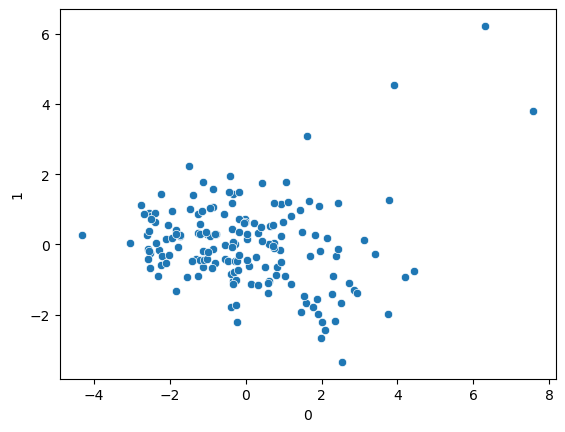

In [77]:
sns.scatterplot(x = df_mortscaled_pca[0] , y = df_mortscaled_pca[1])

<Axes: xlabel='0', ylabel='1'>

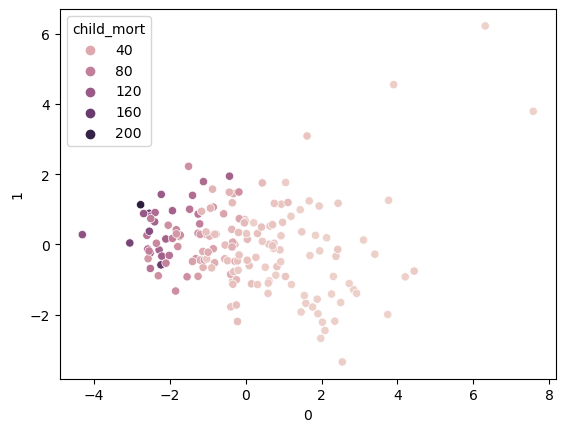

In [78]:
sns.scatterplot(x = df_mortscaled_pca[0] , y = df_mortscaled_pca[1] , hue = df.child_mort)

In [79]:
inertia = []
for k in range(1 , 8):
    kmeans = KMeans(n_clusters = k , random_state = 1).fit(df_mortscaled)
    inertia.append(np.sqrt(kmeans.inertia_))

C:\Users\mercn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\mercn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\mercn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\mercn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\m

Text(0, 0.5, 'Variance')

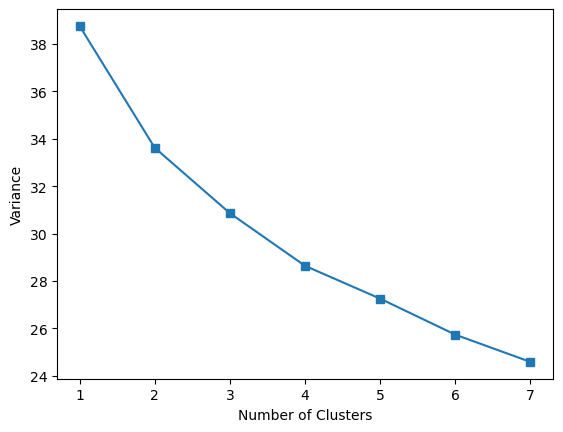

In [80]:
plt.plot(range(1 , 8) , inertia , marker = 's');
plt.xlabel('Number of Clusters')
plt.ylabel('Variance')

In [81]:
kmeans = KMeans(n_clusters = 2 , random_state = 1)

In [82]:
y = kmeans.fit_predict(df_mortscaled)

C:\Users\mercn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\mercn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



<Axes: xlabel='0', ylabel='1'>

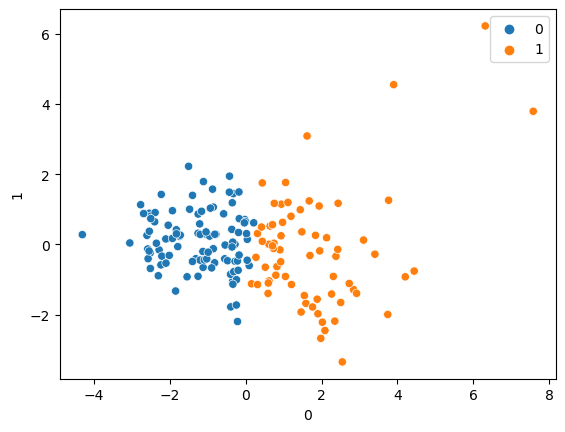

In [83]:
sns.scatterplot(x = df_mortscaled_pca[0] , y = df_mortscaled_pca[1] , hue = y)

In [84]:
df_mortscaled_pca

,0,1
0,-2.583639,-0.130785
1,0.092250,-0.603871
2,-0.553131,-0.410629
3,-2.226330,1.422848
4,0.746286,0.033237
...,...,...
162,-0.930608,1.032223
163,-0.897758,-0.669585
164,0.437007,1.750498
165,-1.826231,0.300030


In [85]:
cluster_df = pd.DataFrame(y , columns = ['Cluster'])
new_df = pd.concat([cluster_df, df] , axis = 1)

In [86]:
new_df

,Cluster,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Country Names
0,0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,0,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,0,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,0,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,3
4,1,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,4
...,...,...,...,...,...,...,...,...,...,...,...
162,0,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,162
163,0,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,163
164,1,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,164
165,0,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,165


In [87]:
fig = px.scatter(pd.concat([new_df , df_mortscaled_pca] , axis  = 1) , x = 0 , y = 1 , color = 'Cluster' , hover_data = ['health' , 'income' , 'life_expec' , 'Country Names'])
fig.show()